In [1]:
import networkx as nx
from collections import Counter

def weisfeiler_lehman(graph, num_iterations=100):
    # Assign initial colors to nodes based on their degrees
    node_colors = {node: graph.degree(node) for node in graph.nodes}

    # Perform WL iterations
    for _ in range(num_iterations):
        new_colors = {}
        for node in graph.nodes:
            # Get the colors of the neighbors
            neighbor_colors = [node_colors[neighbor] for neighbor in graph.neighbors(node)]

            # Combine the current node color with sorted neighbor colors
            combined_colors = [node_colors[node]] + sorted(neighbor_colors)

            # Create a color string and hash it
            color_string = '_'.join(str(color) for color in combined_colors)
            new_colors[node] = hash(color_string)

        # Update the node colors
        node_colors = new_colors
        #print(node_colors)
    print(node_colors)
    return node_colors

{1: 256651535141840035, 2: -502795045046563804, 4: -3592947344218537983, 5: 6753261666490882041, 6: -6755960728564095106, 3: -5350592797958545925}


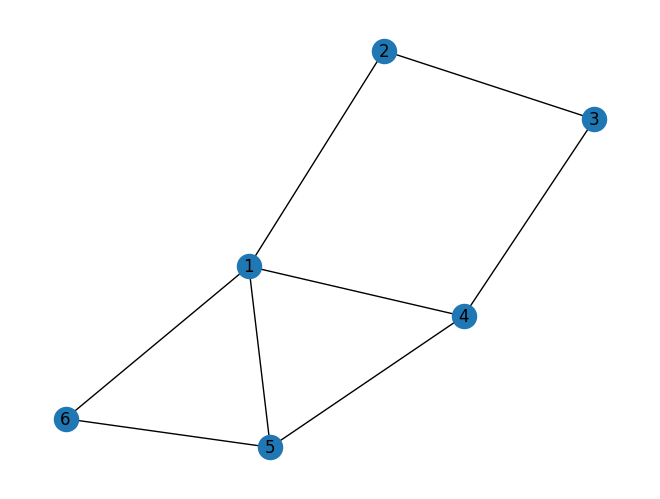

In [2]:
# Create a sample graph
G = nx.Graph()
edges = [(1,2),(1,4),(1,5),(1,6),(2,3),(3,4),(4,5),(5,6)]
G.add_edges_from(edges)
nx.draw(G,with_labels=True)

# Apply the Welsh-Powell algorithm
colors = weisfeiler_lehman(G)

{0: -1788995386452539203, 1: -1788995386452539203, 3: -1788995386452539203, 8: -1788995386452539203, 2: -1788995386452539203, 7: -1788995386452539203, 6: -1788995386452539203, 9: -1788995386452539203, 4: -1788995386452539203, 5: -1788995386452539203}


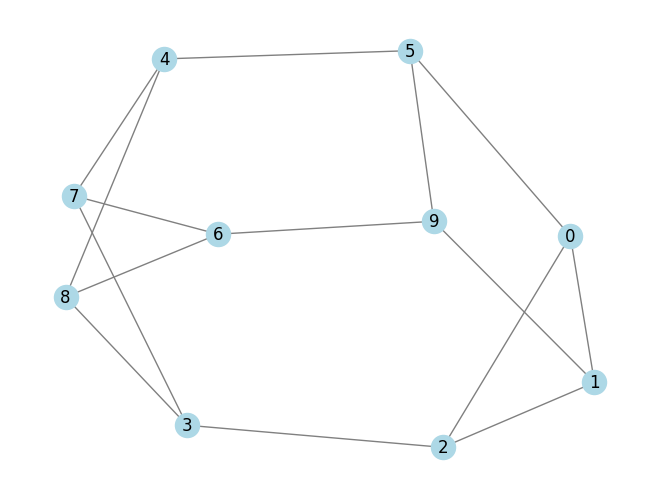

In [3]:
from matplotlib import pyplot as plt

#random_graph = nx.gnp_random_graph(7, 0.4)
random_graph = nx.random_graphs.random_regular_graph(3,10)  #生成包含10个节点、每个节点有2个邻居的规则图RG

# Apply the Welsh-Powell algorithm
colors = weisfeiler_lehman(random_graph,1000)
# Draw the graph
nx.draw(random_graph, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()